In [ ]:
!ln -sf "/content/drive/MyDrive/ConvertedGaitData/Stabalized/front" "/content/front"

In [ ]:
!rm -r /content/front/GEI
!mkdir /content/front/GEI

In [ ]:
!rm -r /content/front/silhouette_vids/
!mkdir /content/front/silhouette_vids/

Testing

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import re
input_dir = "/content/front/"
file_iter = iter(os.listdir(input_dir))
match_string = ".*\\.mp4$"

In [ ]:
file_ = next(file_iter)
if re.match(match_string, file_, re.IGNORECASE):
    input_file_path = os.path.join(input_dir, file_)
    cap = cv2.VideoCapture(input_file_path)
    ret, frame = cap.read()

In [ ]:
ret, frame = cap.read()

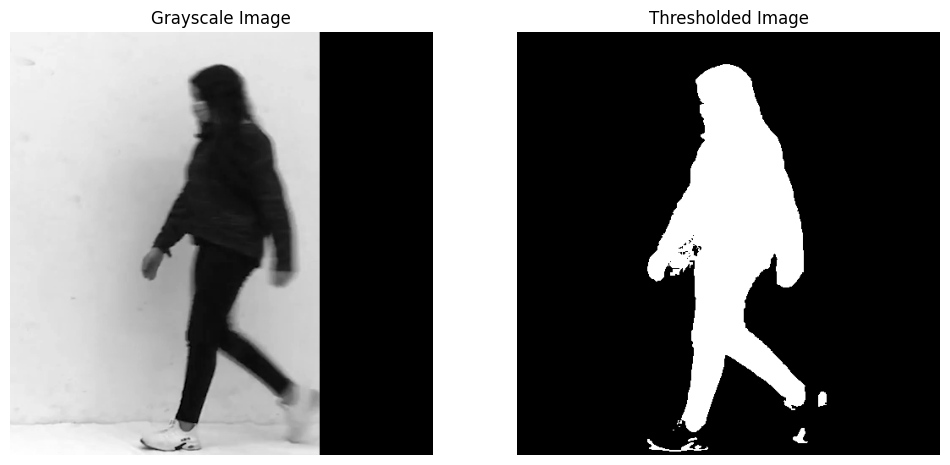

In [ ]:
gr = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
_, thresh1 = cv2.threshold(gr, 150, 255, cv2.THRESH_BINARY_INV)
all_white_columns = np.all(thresh1 == 255, axis=0)
thresh1[:, all_white_columns] = 0
# Plot the images side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the grayscale image
axes[0].imshow(gr, cmap='gray')
axes[0].set_title('Grayscale Image')
axes[0].axis('off')

# Display the thresholded image
axes[1].imshow(thresh1, cmap='gray')
axes[1].set_title('Thresholded Image')
axes[1].axis('off')

plt.show()

In [ ]:
import csv
def get_human_silhouettes(input_file_path, person_output_dir,label,log_dir_path,log_file_name):
  log_file_path = os.path.join(log_dir_path, log_file_name)
  cap = cv2.VideoCapture(input_file_path)
  batch_frames = []
  # Get video properties for output video
  fps = int(cap.get(cv2.CAP_PROP_FPS))
  batch = 0
  while True:
    ret, frame = cap.read()
    if not ret:
      break
    gr = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, thresh1 = cv2.threshold(gr, 150, 255, cv2.THRESH_BINARY_INV)
    all_white_columns = np.all(thresh1 == 255, axis=0)
    thresh1[:, all_white_columns] = 0
    batch_frames.append(thresh1)
    if(len(batch_frames) == fps):
      img_Path = os.path.join(person_output_dir, f'S_{batch}.png')
      stacked_images = np.stack(batch_frames, axis=0)
      average_image = np.mean(stacked_images, axis=0)
      average_image = average_image.astype(np.uint8)
      cv2.imwrite(img_Path, average_image)
      batch_frames = []
      batch+=1
      with open(log_file_path, mode='a', newline='') as log_file:
        relative_path = os.path.relpath(img_Path, log_dir_path)
        log_writer = csv.writer(log_file)
        log_writer.writerow([relative_path,label])

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import re
# Define the paths and match string
input_dir = "/content/front"
output_dir = '/content/front/GEI'
match_string = ".*\\.mp4$"
subject = 0
log_dir_path = '/content/front/GEI/'
log_file_name = "gei.csv"
log_file_path = os.path.join(log_dir_path, log_file_name)
if not os.path.exists(log_file_path):
  with open(log_file_path, mode='w', newline='') as log_file:
    log_writer = csv.writer(log_file)
    log_writer.writerow(['Path', 'Label'])

# Iterate through each file in the directory
for file_ in os.listdir(input_dir):
    # Check if the file matches the specified pattern
    if re.match(match_string, file_, re.IGNORECASE):
        input_file_path = os.path.join(input_dir, file_)
        person_name = os.path.splitext(file_)[0]

        # Create the output directory for this person if it doesn't exist
        person_output_dir = os.path.join(output_dir, person_name)
        if not os.path.exists(person_output_dir):
            os.makedirs(person_output_dir)

        # Call the get_human_silhouettes function
        get_human_silhouettes(input_file_path, person_output_dir,subject,log_dir_path,log_file_name)
        subject+=1
        print(f"Processed {input_file_path} and saved results to {person_output_dir}")


Processed /content/front/Sub0.mp4 and saved results to /content/front/GEI/Sub0
Processed /content/front/Sub4.mp4 and saved results to /content/front/GEI/Sub4
Processed /content/front/Sub5.mp4 and saved results to /content/front/GEI/Sub5
Processed /content/front/Sub6.mp4 and saved results to /content/front/GEI/Sub6
Processed /content/front/Sub7.mp4 and saved results to /content/front/GEI/Sub7
Processed /content/front/Sub11.mp4 and saved results to /content/front/GEI/Sub11
Processed /content/front/Sub12.mp4 and saved results to /content/front/GEI/Sub12
Processed /content/front/Sub13.mp4 and saved results to /content/front/GEI/Sub13
Processed /content/front/Sub16.mp4 and saved results to /content/front/GEI/Sub16
Processed /content/front/Sub17.mp4 and saved results to /content/front/GEI/Sub17
Processed /content/front/Sub20.mp4 and saved results to /content/front/GEI/Sub20
Processed /content/front/Sub21.mp4 and saved results to /content/front/GEI/Sub21
Processed /content/front/Sub24.mp4 and

Silhoutte Video Extractions

In [ ]:
import csv
def get_human_silhouette_vids(input_file_path, person_output_dir,label,log_dir_path,log_file_name):
  log_file_path = os.path.join(log_dir_path, log_file_name)
  cap = cv2.VideoCapture(input_file_path)
  batch_frames = []
  # Get video properties for output video
  fps = int(cap.get(cv2.CAP_PROP_FPS))
  fourcc = cv2.VideoWriter_fourcc(*'mp4v')
  # Define the codec
  width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  video_path = os.path.join(person_output_dir, f'sil.mp4')
  out = cv2.VideoWriter(video_path, fourcc, fps, (width, height), isColor=False)
  with open(log_file_path, mode='a', newline='') as log_file:
        relative_path = os.path.relpath(video_path, log_dir_path)
        log_writer = csv.writer(log_file)
        log_writer.writerow([relative_path,label])
  while True:
    ret, frame = cap.read()
    if not ret:
      break
    gr = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    _, thresh1 = cv2.threshold(gr, 150, 255, cv2.THRESH_BINARY_INV)
    all_white_columns = np.all(thresh1 == 255, axis=0)
    thresh1[:, all_white_columns] = 0
    kernel = np.ones((5, 5), np.uint8)
    # Apply dilation
    dilated_image = cv2.dilate(thresh1, kernel, iterations=1)
    out.write(dilated_image)
  cap.release()
  out.release()

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import re
# Define the paths and match string
input_dir = "/content/front"
output_dir = '/content/front/silhouette_vids/'
match_string = ".*\\.mp4$"
subject = 0
log_dir_path = '/content/front/silhouette_vids/'
log_file_name = "sil.csv"
log_file_path = os.path.join(log_dir_path, log_file_name)
if not os.path.exists(log_file_path):
  with open(log_file_path, mode='w', newline='') as log_file:
    log_writer = csv.writer(log_file)
    log_writer.writerow(['Path', 'Label'])

# Iterate through each file in the directory
for file_ in os.listdir(input_dir):
    # Check if the file matches the specified pattern
    if re.match(match_string, file_, re.IGNORECASE):
        input_file_path = os.path.join(input_dir, file_)
        person_name = os.path.splitext(file_)[0]

        # Create the output directory for this person if it doesn't exist
        person_output_dir = os.path.join(output_dir, person_name)
        if not os.path.exists(person_output_dir):
            os.makedirs(person_output_dir)

        # Call the get_human_silhouettes function
        get_human_silhouette_vids(input_file_path, person_output_dir,subject,log_dir_path,log_file_name)
        subject+=1
        print(f"Processed {input_file_path} and saved results to {person_output_dir}")


Processed /content/front/Sub0.mp4 and saved results to /content/front/silhouette_vids/Sub0
Processed /content/front/Sub4.mp4 and saved results to /content/front/silhouette_vids/Sub4
Processed /content/front/Sub5.mp4 and saved results to /content/front/silhouette_vids/Sub5
Processed /content/front/Sub6.mp4 and saved results to /content/front/silhouette_vids/Sub6
Processed /content/front/Sub7.mp4 and saved results to /content/front/silhouette_vids/Sub7
Processed /content/front/Sub11.mp4 and saved results to /content/front/silhouette_vids/Sub11
Processed /content/front/Sub12.mp4 and saved results to /content/front/silhouette_vids/Sub12
Processed /content/front/Sub13.mp4 and saved results to /content/front/silhouette_vids/Sub13
Processed /content/front/Sub16.mp4 and saved results to /content/front/silhouette_vids/Sub16
Processed /content/front/Sub17.mp4 and saved results to /content/front/silhouette_vids/Sub17
Processed /content/front/Sub20.mp4 and saved results to /content/front/silhouett

Test

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import re
input_dir = "/content/front/"
file_iter = iter(os.listdir(input_dir))
match_string = ".*\\.mp4$"

In [ ]:
file_ = next(file_iter)
if re.match(match_string, file_, re.IGNORECASE):
    input_file_path = os.path.join(input_dir, file_)
    cap = cv2.VideoCapture(input_file_path)
    ret, frame = cap.read()

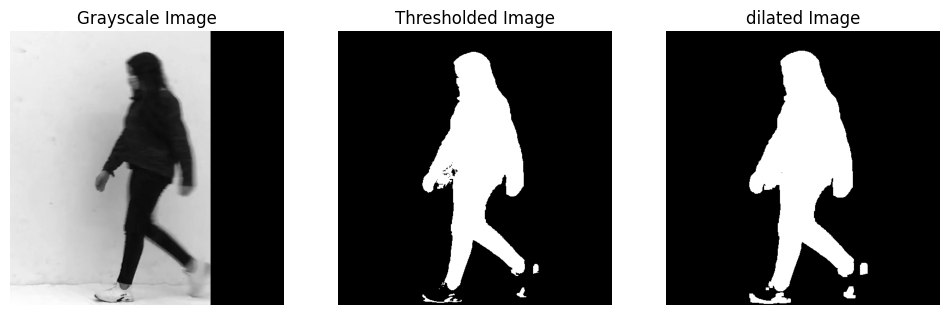

In [ ]:
gr = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
_, thresh1 = cv2.threshold(gr, 150, 255, cv2.THRESH_BINARY_INV)
all_white_columns = np.all(thresh1 == 255, axis=0)
thresh1[:, all_white_columns] = 0

kernel = np.ones((5, 5), np.uint8)
# Apply dilation
dilated_image = cv2.dilate(thresh1, kernel, iterations=1)

# Plot the images side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Display the grayscale image
axes[0].imshow(gr, cmap='gray')
axes[0].set_title('Grayscale Image')
axes[0].axis('off')

# Display the thresholded image
axes[1].imshow(thresh1, cmap='gray')
axes[1].set_title('Thresholded Image')
axes[1].axis('off')

# Display the eroded image
axes[2].imshow(dilated_image, cmap='gray')
axes[2].set_title('dilated Image')
axes[2].axis('off')
plt.show()